C:\Users\Rubens\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


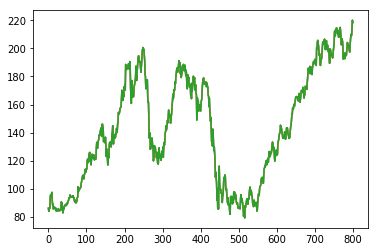

In [14]:
#%reset

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp
np.random.seed(42)
dataframe = pd.read_csv('Apple_Data_300.csv').ix[0:800,:]
dataframe.head()

plt.plot(range(0,dataframe.shape[0]),dataframe.iloc[:,1])
plt.show()

In [15]:
x1=np.array(dataframe.iloc[:,1]+np.random.randn(dataframe.shape[0])).astype(np.float32).reshape(-1,1)

y=np.array(dataframe.iloc[:,1]).T.astype(np.float32).reshape(-1,1)

tfd = tfp.distributions

init = tf.global_variables_initializer()

In [16]:
with tf.Session() as sess:

    model = tf.keras.Sequential([
      tf.keras.layers.Dense(1,kernel_initializer='glorot_uniform'),
      tfp.layers.DistributionLambda(lambda t: tfd.Normal(loc=t, scale=1))
    ])
    negloglik = lambda x, rv_x: -rv_x.log_prob(x)
    
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001), loss=negloglik)
    
    model.fit(x1,y, epochs=500, verbose=True, batch_size=16)
    
    yhat = model(x1)
    mean = yhat.mean()


    sess.run(init)
    mm = sess.run(mean)    
    mean = yhat.mean()
    stddev = yhat.stddev()
    mean_plus_2_std = sess.run(mean - 2. * stddev)
    mean_minus_2_std = sess.run(mean + 2. * stddev)


Epoch 1/500
801/801 [==============================] - 0s 272us/sample - loss: 281.8678
Epoch 2/500
801/801 [==============================] - 0s 47us/sample - loss: 144.1555
Epoch 3/500
801/801 [==============================] - 0s 50us/sample - loss: 66.0816
Epoch 4/500
801/801 [==============================] - 0s 50us/sample - loss: 26.9306
Epoch 5/500
801/801 [==============================] - 0s 50us/sample - loss: 10.2845
Epoch 6/500
801/801 [==============================] - 0s 50us/sample - loss: 4.0894
Epoch 7/500
801/801 [==============================] - 0s 51us/sample - loss: 2.1032
Epoch 8/500
801/801 [==============================] - 0s 51us/sample - loss: 1.5625
Epoch 9/500
801/801 [==============================] - 0s 49us/sample - loss: 1.4361
Epoch 10/500
801/801 [==============================] - 0s 52us/sample - loss: 1.4113
Epoch 11/500
801/801 [==============================] - 0s 50us/sample - loss: 1.4075
Epoch 12/500
801/801 [==============================] -

801/801 [==============================] - 0s 51us/sample - loss: 1.4045
Epoch 97/500
801/801 [==============================] - 0s 52us/sample - loss: 1.4100
Epoch 98/500
801/801 [==============================] - 0s 56us/sample - loss: 1.4071
Epoch 99/500
801/801 [==============================] - 0s 47us/sample - loss: 1.4051
Epoch 100/500
801/801 [==============================] - 0s 28us/sample - loss: 1.4049
Epoch 101/500
801/801 [==============================] - 0s 42us/sample - loss: 1.4061
Epoch 102/500
801/801 [==============================] - 0s 42us/sample - loss: 1.4110
Epoch 103/500
801/801 [==============================] - 0s 41us/sample - loss: 1.4137
Epoch 104/500
801/801 [==============================] - 0s 58us/sample - loss: 1.4076
Epoch 105/500
801/801 [==============================] - 0s 59us/sample - loss: 1.4101
Epoch 106/500
801/801 [==============================] - 0s 55us/sample - loss: 1.4056
Epoch 107/500
801/801 [==============================] - 0s 

801/801 [==============================] - 0s 44us/sample - loss: 1.4084
Epoch 191/500
801/801 [==============================] - 0s 47us/sample - loss: 1.4080
Epoch 192/500
801/801 [==============================] - 0s 52us/sample - loss: 1.4027
Epoch 193/500
801/801 [==============================] - 0s 52us/sample - loss: 1.4076
Epoch 194/500
801/801 [==============================] - 0s 51us/sample - loss: 1.4015
Epoch 195/500
801/801 [==============================] - 0s 50us/sample - loss: 1.4192
Epoch 196/500
801/801 [==============================] - 0s 50us/sample - loss: 1.4318
Epoch 197/500
801/801 [==============================] - 0s 55us/sample - loss: 1.4059
Epoch 198/500
801/801 [==============================] - 0s 44us/sample - loss: 1.4148
Epoch 199/500
801/801 [==============================] - 0s 20us/sample - loss: 1.4072
Epoch 200/500
801/801 [==============================] - 0s 39us/sample - loss: 1.4065
Epoch 201/500
801/801 [==============================] - 

801/801 [==============================] - 0s 55us/sample - loss: 1.4050
Epoch 285/500
801/801 [==============================] - 0s 44us/sample - loss: 1.4001
Epoch 286/500
801/801 [==============================] - 0s 47us/sample - loss: 1.4033
Epoch 287/500
801/801 [==============================] - 0s 51us/sample - loss: 1.4195
Epoch 288/500
801/801 [==============================] - 0s 44us/sample - loss: 1.4182
Epoch 289/500
801/801 [==============================] - 0s 42us/sample - loss: 1.4112
Epoch 290/500
801/801 [==============================] - 0s 42us/sample - loss: 1.4040
Epoch 291/500
801/801 [==============================] - 0s 41us/sample - loss: 1.4104
Epoch 292/500
801/801 [==============================] - 0s 41us/sample - loss: 1.4087
Epoch 293/500
801/801 [==============================] - 0s 40us/sample - loss: 1.4060
Epoch 294/500
801/801 [==============================] - 0s 41us/sample - loss: 1.4035
Epoch 295/500
801/801 [==============================] - 

801/801 [==============================] - 0s 44us/sample - loss: 1.4076
Epoch 379/500
801/801 [==============================] - 0s 41us/sample - loss: 1.4049
Epoch 380/500
801/801 [==============================] - 0s 44us/sample - loss: 1.4072
Epoch 381/500
801/801 [==============================] - 0s 44us/sample - loss: 1.4080
Epoch 382/500
801/801 [==============================] - 0s 47us/sample - loss: 1.4026
Epoch 383/500
801/801 [==============================] - 0s 45us/sample - loss: 1.4021
Epoch 384/500
801/801 [==============================] - 0s 44us/sample - loss: 1.4032
Epoch 385/500
801/801 [==============================] - 0s 41us/sample - loss: 1.4173
Epoch 386/500
801/801 [==============================] - 0s 47us/sample - loss: 1.4087
Epoch 387/500
801/801 [==============================] - 0s 44us/sample - loss: 1.4078
Epoch 388/500
801/801 [==============================] - 0s 44us/sample - loss: 1.4024
Epoch 389/500
801/801 [==============================] - 

801/801 [==============================] - 0s 44us/sample - loss: 1.4114
Epoch 473/500
801/801 [==============================] - 0s 41us/sample - loss: 1.4170
Epoch 474/500
801/801 [==============================] - 0s 41us/sample - loss: 1.4087
Epoch 475/500
801/801 [==============================] - 0s 41us/sample - loss: 1.4026
Epoch 476/500
801/801 [==============================] - 0s 41us/sample - loss: 1.4038
Epoch 477/500
801/801 [==============================] - 0s 42us/sample - loss: 1.4101
Epoch 478/500
801/801 [==============================] - 0s 42us/sample - loss: 1.4091
Epoch 479/500
801/801 [==============================] - 0s 44us/sample - loss: 1.4098
Epoch 480/500
801/801 [==============================] - 0s 42us/sample - loss: 1.4039
Epoch 481/500
801/801 [==============================] - 0s 44us/sample - loss: 1.4028
Epoch 482/500
801/801 [==============================] - 0s 42us/sample - loss: 1.4081
Epoch 483/500
801/801 [==============================] - 

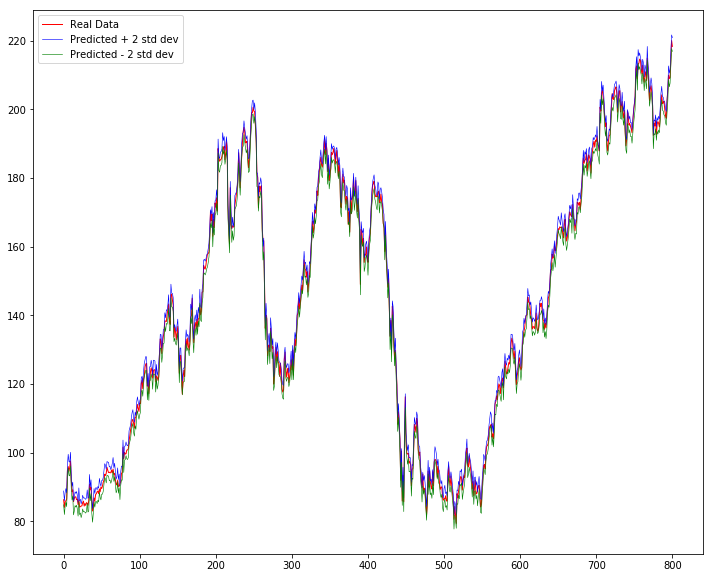

In [19]:
plt.figure(figsize=(12,10))
plt.plot(y,color='red',linewidth=1,label='Real Data')
#plt.plot(mm)
plt.plot(mean_minus_2_std,color='blue',linewidth=0.6,label='Predicted + 2 std dev')
plt.plot(mean_plus_2_std,color='green',linewidth=0.6,label='Predicted - 2 std dev')
plt.legend()
plt.show()